In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt;


In [2]:
plt.rcParams['figure.figsize'] = (20, 10)

# Let's get the data from Seattle open data site

Data is published on a hourly basis from 2012 to now and can be found in the below url. Make a pandas dataframe from this for our analysis.

In [3]:
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url, parse_dates=True)

In [4]:
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,04/30/2019 11:00:00 PM,8.0,16.0
1,04/30/2019 10:00:00 PM,15.0,29.0
2,04/30/2019 09:00:00 PM,17.0,54.0
3,04/30/2019 08:00:00 PM,58.0,91.0
4,04/30/2019 07:00:00 PM,106.0,175.0


In [5]:
df.shape

(57624, 3)

In [6]:
df.index = pd.DatetimeIndex(df.Date)

In [7]:
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-04-30 23:00:00,04/30/2019 11:00:00 PM,8.0,16.0
2019-04-30 22:00:00,04/30/2019 10:00:00 PM,15.0,29.0
2019-04-30 21:00:00,04/30/2019 09:00:00 PM,17.0,54.0
2019-04-30 20:00:00,04/30/2019 08:00:00 PM,58.0,91.0
2019-04-30 19:00:00,04/30/2019 07:00:00 PM,106.0,175.0


In [8]:
df.drop(columns=['Date'], inplace=True)
df.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-04-30 23:00:00,8.0,16.0
2019-04-30 22:00:00,15.0,29.0
2019-04-30 21:00:00,17.0,54.0
2019-04-30 20:00:00,58.0,91.0
2019-04-30 19:00:00,106.0,175.0


In [ ]:
df['total'] = df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk']
df.drop(columns=['Fremont Bridge East Sidewalk', 'Fremont Bridge West Sidewalk'], inplace=True)

# Let's start with visualization to understand this data

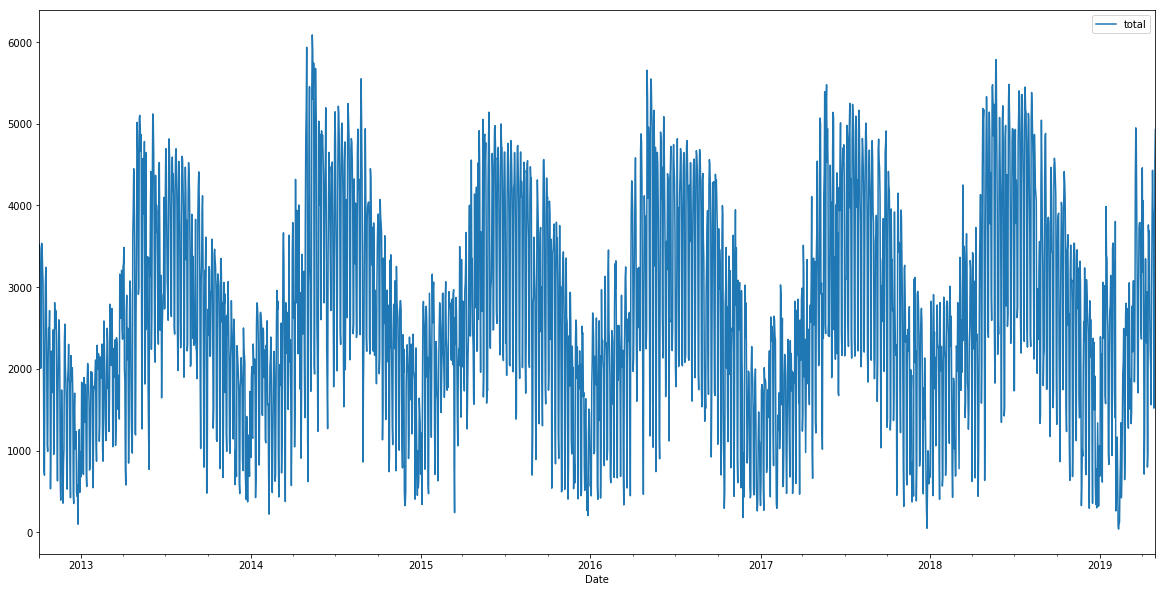

In [ ]:
df.resample('D').sum().plot()

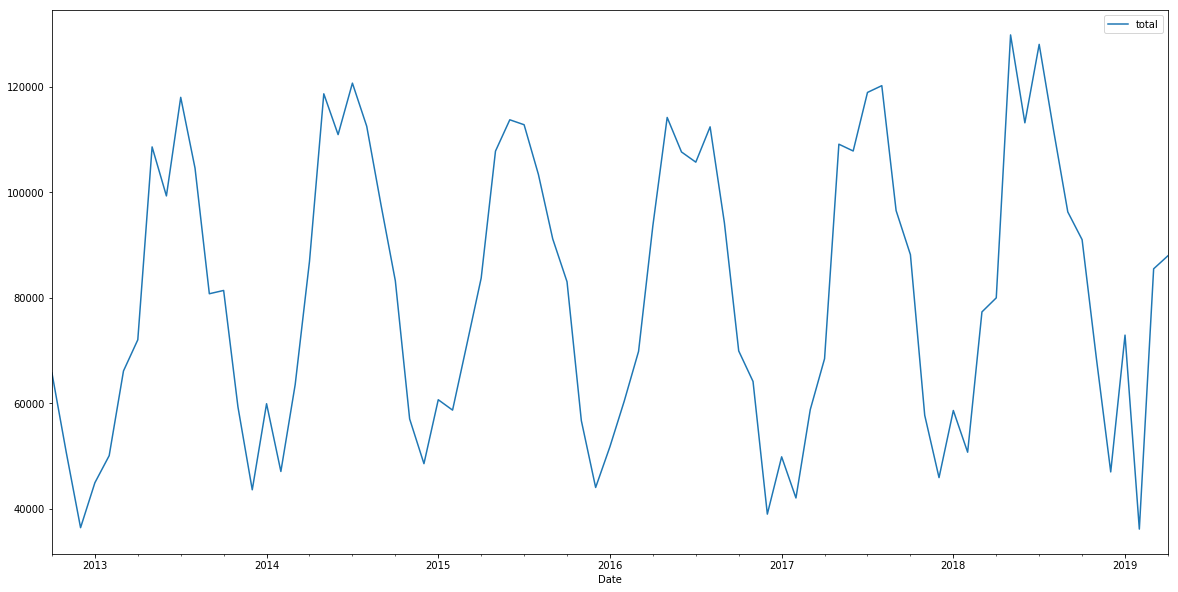

In [ ]:
df.resample('M').sum().plot()

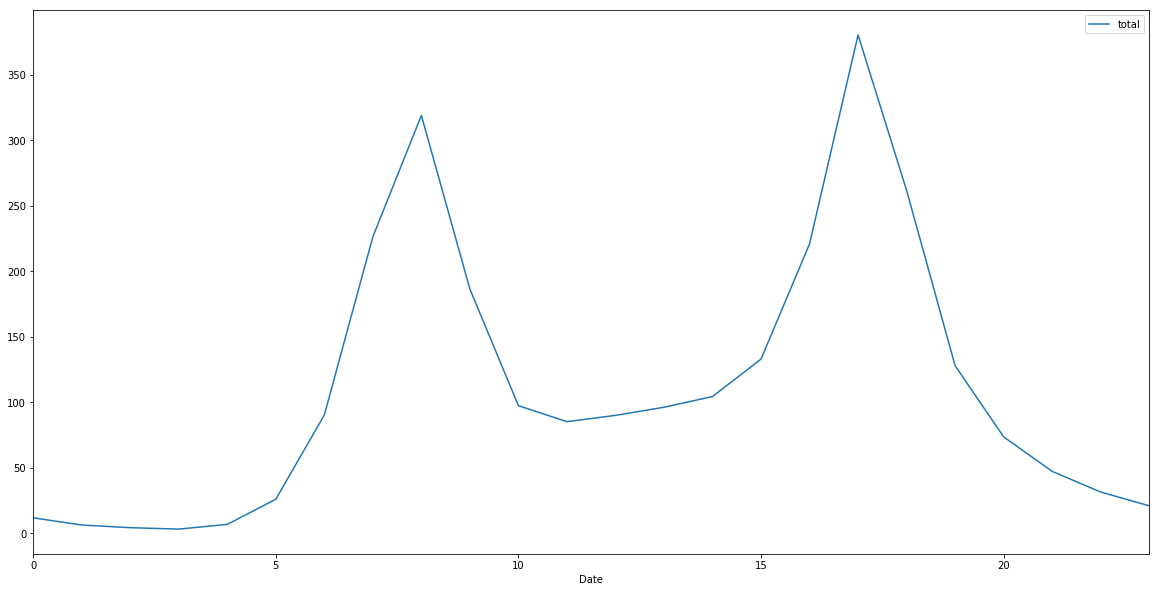

In [ ]:
df.groupby(df.index.hour).mean().plot()

# Let's look a this data on hourly basis across days

In [ ]:
pivoted_data = df.pivot_table('total', index=df.index.hour, columns=df.index.date)

pivoted_data.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
Date,,,,,
0,13.0,18.0,11.0,15.0,11.0
1,10.0,3.0,8.0,15.0,17.0
2,2.0,9.0,7.0,9.0,3.0
3,5.0,3.0,4.0,3.0,6.0
4,7.0,8.0,9.0,5.0,3.0


In [ ]:
# plot of this dates together

pivoted_data.plot(legend=False, alpha=0.1)

# Let's do unsupervised learning to detangle this chart

In [ ]:
from sklearn.decomposition import PCA

X = pivoted_data.fillna(0).T.values;
X.shape

In [ ]:
pca = PCA(2, svd_solver='full').fit(X)
X_PCA = pca.transform(X)

In [ ]:
X_PCA.shape

In [ ]:
plt.scatter(X_PCA[:, 0], X_PCA[:, 1])

In [ ]:
dayofweek = pd.DatetimeIndex(pivoted_data.columns).dayofweek

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar();

# Let's do a simple clustering to identify these two groups

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(2)
gmm.fit(X_PCA)

labels = gmm.predict(X_PCA)
labels

In [ ]:
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=labels, cmap='rainbow')

# I can write markdown in this notebook